## 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!


### (1) 데이터 가져오기
- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.


In [53]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [54]:
df_X = diabetes.data
df_y = diabetes.target

### (2) 모델에 입력할 데이터 X 준비하기
- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [55]:
import numpy as np

X = np.array(df_X)
X.shape

(442, 10)

### (3) 모델에 예측할 데이터 y 준비하기
- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [56]:
y = np.array(df_y)

### (4) train 데이터와 test 데이터로 분리하기
- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f"전체 학습 데이터: {X.shape} 레이블: {y.shape}")
print(f"학습 데이터: {X_train.shape} 레이블: {y_train.shape}")
print(f"테스트 데이터: {X_test.shape} 레이블: {y_test.shape}")

전체 학습 데이터: (442, 10) 레이블: (442,)
학습 데이터: (353, 10) 레이블: (353,)
테스트 데이터: (89, 10) 레이블: (89,)


### (5) 모델 준비하기
- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [99]:
def model(X, y, epochs, learning_rate):
    losses = []
    weight_history = []
    bias_history = []
    
    W = np.ones(shape=(X.shape[1],))
    b = 0
    
    for epoch in range(epochs):
        y_pred = X.dot(W) + b
        l = loss(y, y_pred)
        w_grad, b_grad = gradient(X, y, y_pred)
        W -= learning_rate * w_grad 
        b -= learning_rate * b_grad
        print(f'epoch {epoch + 1}, loss: {l}')
        losses.append(l)
        weight_history.append(W.copy())
        bias_history.append(b)
    
    return W, b, losses, weight_history, bias_history

### (6) 손실함수 loss 정의하기
- 손실함수를 MSE 함수로 정의해주세요.

In [100]:
def loss(y, y_pred):
    return ((y_pred - y) ** 2).mean()

### (7) 기울기를 구하는 gradient 함수 구현하기
- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [101]:
def gradient(x, y, y_pred):
    error = y_pred - y
    w_grad = 2 * np.dot(x.T, error) / len(y)
    b_grad = 2 * error.mean()
    return w_grad, b_grad

### (8) 하이퍼 파라미터인 학습률 설정하기
- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.


In [102]:
learning_rate = 0.8

### (9) 모델 학습하기
- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.


In [103]:
epochs = 10000

In [104]:
W, b, losses, weight_history, bias_history = model(X_train, y_train, epochs, learning_rate)

epoch 1, loss: 29051.841096506516
epoch 2, loss: 14120.300194758489
epoch 3, loss: 8707.242806539707
epoch 4, loss: 6721.922181161203
epoch 5, loss: 5971.583157393518
epoch 6, loss: 5666.7854856084505
epoch 7, loss: 5523.296449139636
epoch 8, loss: 5438.763633974172
epoch 9, loss: 5376.314024648858
epoch 10, loss: 5322.648548269363
epoch 11, loss: 5272.955689735181
epoch 12, loss: 5225.48022856514
epoch 13, loss: 5179.567912039961
epoch 14, loss: 5134.961499113496
epoch 15, loss: 5091.547310298781
epoch 16, loss: 5049.263964561347
epoch 17, loss: 5008.069505629812
epoch 18, loss: 4967.929549586896
epoch 19, loss: 4928.813000840064
epoch 20, loss: 4890.69049328409
epoch 21, loss: 4853.533813047025
epoch 22, loss: 4817.3156750894495
epoch 23, loss: 4782.009627654202
epoch 24, loss: 4747.590003189836
epoch 25, loss: 4714.031886438216
epoch 26, loss: 4681.311089121711
epoch 27, loss: 4649.4041274142555
epoch 28, loss: 4618.288200810515
epoch 29, loss: 4587.941171882577
epoch 30, loss: 4558

### (10) test 데이터에 대한 성능 확인하기
- test 데이터에 대한 성능을 확인해주세요.


In [105]:
y_pred = np.dot(X_test, W) + b

In [106]:
loss(y_test, y_pred)

2730.731910561329

### (11) 정답 데이터와 예측한 데이터 시각화하기
- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

In [107]:
import matplotlib.pyplot as plt

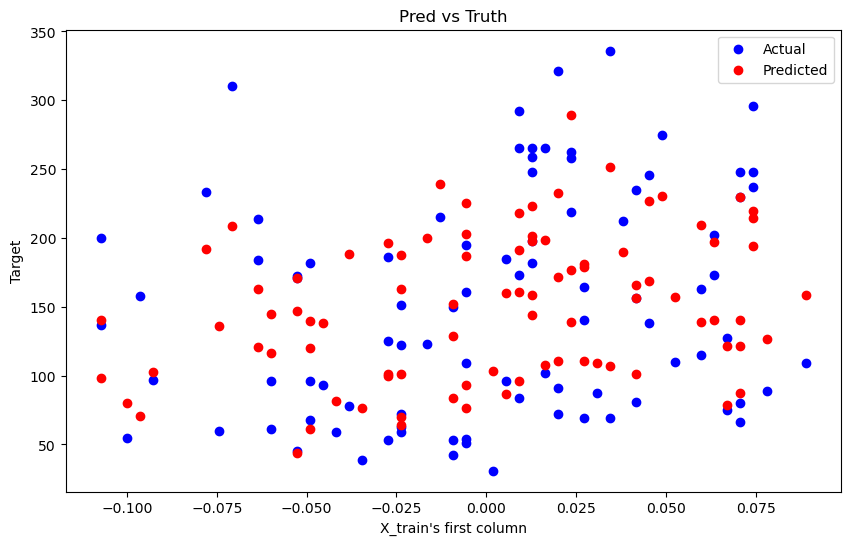

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')

plt.xlabel('X_train\'s first column')
plt.ylabel('Target')
plt.title('Pred vs Truth')

plt.legend()
plt.show()